In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bell_Amundsen_Extent = pd.read_excel(filepath, sheet_name='Bell-Amundsen-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Bell_Amundsen_Extent)
fp.date_time(Bell_Amundsen_Extent)

,Extent,Date
0,1179855.894,1979-01-01
1,879585.254,1979-02-01
2,791619.096,1979-03-01
3,1254912.071,1979-04-01
4,1620142.247,1979-05-01
...,...,...
533,1556568.455,2023-06-01
534,1917507.979,2023-07-01
535,2601630.327,2023-08-01
536,2534223.780,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bell_Amundsen_Extent['Extent'] = scaler.fit_transform(Bell_Amundsen_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 3
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bell_Amundsen_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((524, 12, 1), (524,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bell_Amund_model_LT3/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
46/53 [=========================>....] - ETA: 0s - loss: 0.2401 - root_mean_squared_error: 0.4900

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 8s 98ms/step - loss: 0.2369 - root_mean_squared_error: 0.4868 - val_loss: 0.2646 - val_root_mean_squared_error: 0.5144
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1959 - root_mean_squared_error: 0.4426

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.1932 - root_mean_squared_error: 0.4396 - val_loss: 0.2223 - val_root_mean_squared_error: 0.4715
Epoch 3/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1589 - root_mean_squared_error: 0.3987

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.1597 - root_mean_squared_error: 0.3996 - val_loss: 0.1861 - val_root_mean_squared_error: 0.4314
Epoch 4/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1252 - root_mean_squared_error: 0.3538

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 5s 86ms/step - loss: 0.1282 - root_mean_squared_error: 0.3581 - val_loss: 0.1536 - val_root_mean_squared_error: 0.3919
Epoch 5/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1041 - root_mean_squared_error: 0.3226

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.1020 - root_mean_squared_error: 0.3194 - val_loss: 0.1271 - val_root_mean_squared_error: 0.3566
Epoch 6/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0783 - root_mean_squared_error: 0.2799

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0781 - root_mean_squared_error: 0.2795 - val_loss: 0.1018 - val_root_mean_squared_error: 0.3191
Epoch 7/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0622 - root_mean_squared_error: 0.2493

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0606 - root_mean_squared_error: 0.2461 - val_loss: 0.0775 - val_root_mean_squared_error: 0.2784
Epoch 8/50
53/53 [==============================] - ETA: 0s - loss: 0.0428 - root_mean_squared_error: 0.2070

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0428 - root_mean_squared_error: 0.2070 - val_loss: 0.0619 - val_root_mean_squared_error: 0.2487
Epoch 9/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0341 - root_mean_squared_error: 0.1846

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0358 - root_mean_squared_error: 0.1891 - val_loss: 0.0468 - val_root_mean_squared_error: 0.2164
Epoch 10/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0281 - root_mean_squared_error: 0.1677

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0269 - root_mean_squared_error: 0.1641 - val_loss: 0.0379 - val_root_mean_squared_error: 0.1948
Epoch 11/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0204 - root_mean_squared_error: 0.1427

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0208 - root_mean_squared_error: 0.1441 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1619
Epoch 12/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0195 - root_mean_squared_error: 0.1398

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.0191 - root_mean_squared_error: 0.1382 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1414
Epoch 13/50
53/53 [==============================] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.1253

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0157 - root_mean_squared_error: 0.1253 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1241
Epoch 14/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1143

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1194
Epoch 15/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0142 - root_mean_squared_error: 0.1191 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1422
Epoch 16/50
53/53 [==============================] - ETA: 0s - loss: 0.0149 - root_mean_squared_error: 0.1221

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0149 - root_mean_squared_error: 0.1221 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1063
Epoch 17/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1091

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0117 - root_mean_squared_error: 0.1081 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1063
Epoch 18/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0124 - root_mean_squared_error: 0.1112 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1632
Epoch 19/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1063
Epoch 20/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0144 - root_mean_squared_error: 0.1202 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1081
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0126 - root_mean_squared_error: 0.1124 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1203
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0132 - root_mean_squared_error: 0.1148 - val_loss: 0.0174 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0120 - root_mean_squared_error: 0.1097 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0991
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0126 - root_mean_squared_error: 0.1124 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1002
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0123 - root_mean_squared_error: 0.1108 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0993
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0106 - root_mean_squared_error: 0.1027 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1296
Epoch 27/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0143 - root_mean_squared_error: 0.1196 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1149
Epoch 28/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0116 - root_mean_squared_error: 0.1078 - val_loss: 0.0099 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0147 - root_mean_squared_error: 0.1212 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0989
Epoch 31/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0141 - root_mean_squared_error: 0.1187 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1274
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0131 - root_mean_squared_error: 0.1147 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0991
Epoch 33/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0108 - root_mean_squared_error: 0.1039

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0110 - root_mean_squared_error: 0.1050 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0972
Epoch 34/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0093 - root_mean_squared_error: 0.0963 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1047
Epoch 35/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0138 - root_mean_squared_error: 0.1175 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1070
Epoch 36/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0132 - root_mean_squared_error: 0.1147 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1036
Epoch 37/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1489
Epoch 38/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0109 - root_mean_squared_error: 0.1044 - val_loss: 0.0096 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT3\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0148 - root_mean_squared_error: 0.1218 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0961
Epoch 46/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0119 - root_mean_squared_error: 0.1090 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0980
Epoch 47/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1047
Epoch 48/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0111 - root_mean_squared_error: 0.1052 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1113
Epoch 49/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0125 - root_mean_squared_error: 0.1119 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1258
Epoch 50/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0105 - root_mean_squared_error: 0.1026 - val_loss: 0.0109 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.7618374307950337 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

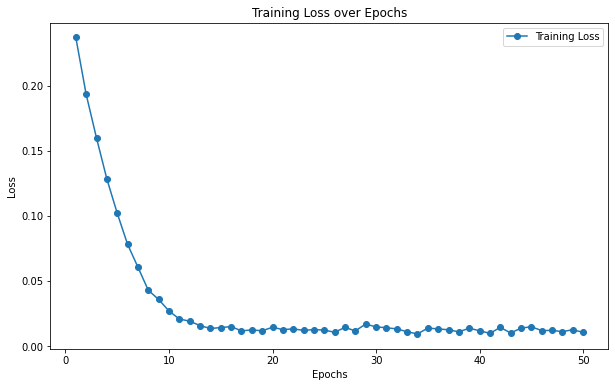

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

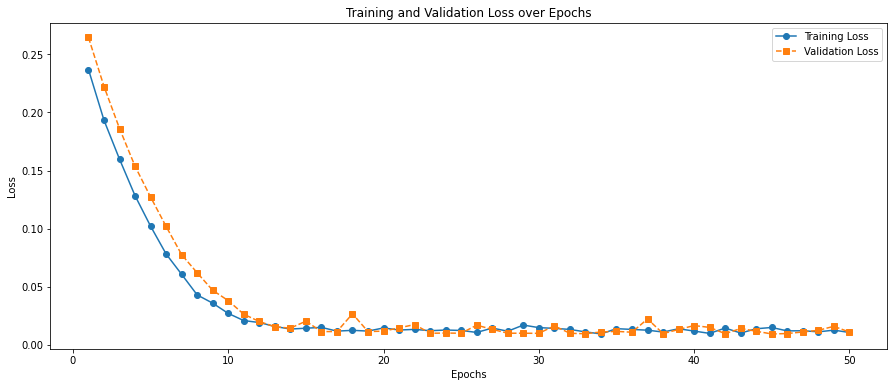

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bell_Amund_model_LT3/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.09566297840111433
MAE : 0.07734003235374928


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,1.926855e+06,1714381.703
1,2.350349e+06,2067343.547
2,2.260734e+06,1856673.675
3,2.148282e+06,1914289.680
4,1.711313e+06,1802244.842
5,1.251010e+06,1202791.069
6,7.132884e+05,752834.272
7,4.443073e+05,451914.219
8,5.037134e+05,439855.813
9,7.019036e+05,807857.307


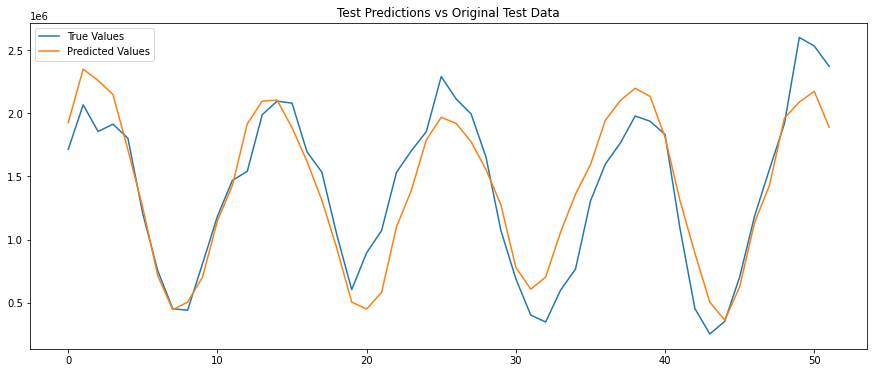

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

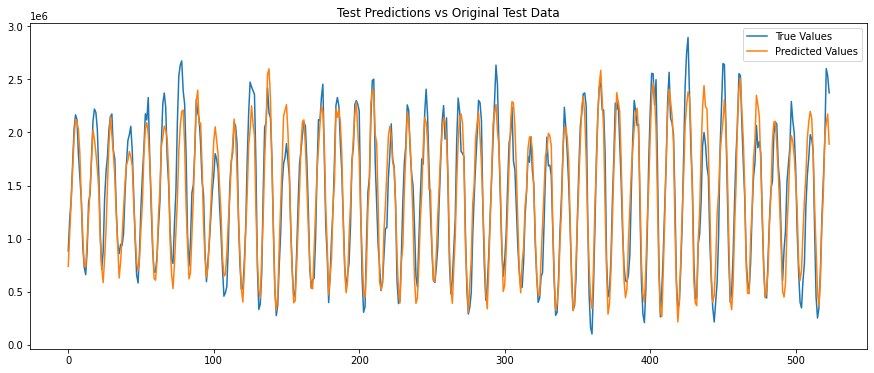

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()